# Supervised Learning

Supervised learning is a type of machine learning which learn from **labeled data**. Such data has already labeled in the first place, or we have to create the label by ourselves, manually or automatically. By convention, those labels are usually called  **target** or simply **label**, and the data we will use to train the machine is called **predictor**, or in more common name, **features**.

<center><img src="../assets/img/supervised.png"/></center>

Supervised learning can be divided into 2 categories: **classification** and **regression**.

## Classification


## Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sklearn.__version__

'0.21.3'

## Classification

In [5]:
df_train = pd.read_csv("../data/fashionmnist/fashion-mnist_train.csv")
df_test = pd.read_csv("../data/fashionmnist/fashion-mnist_test.csv")

train_set = df_train.to_numpy()
test_set = df_test.to_numpy()

In [5]:
y_train, X_train = train_set[:, 0], train_set[:, 1:]
y_test, X_test = test_set[:, 0], test_set[:, 1:]

In [6]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [7]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
id2label = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

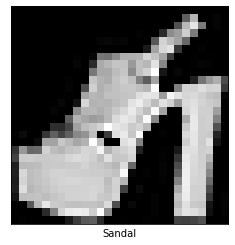

In [9]:
idx = np.random.randint(0, 60000)
plt.imshow(X_train[idx].reshape([28, 28]), cmap='gray')
plt.xlabel(id2label[y_train[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.linear_model import LinearRegression

In [11]:
model = SVC(C=1, gamma="scale", max_iter=100)
model

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
model.fit(X_train, y_train)

/Users/syahrulhamdani/.pyenv/versions/3.7.4/envs/hktv/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_hat = model.predict(X_train)

In [18]:
accuracy = accuracy_score(y_train, y_hat)
accuracy

0.6078166666666667

In [19]:
y_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.6153


In [22]:
print(classification_report(y_train, y_hat, target_names=list(id2label.values())))

              precision    recall  f1-score   support

 T-shirt/top       0.56      0.57      0.57      6000
     Trouser       0.97      0.76      0.85      6000
    Pullover       0.38      0.67      0.49      6000
       Dress       0.46      0.69      0.55      6000
        Coat       0.51      0.46      0.49      6000
      Sandal       0.67      0.48      0.56      6000
       Shirt       0.54      0.12      0.19      6000
     Sneaker       0.61      0.79      0.68      6000
         Bag       0.92      0.76      0.83      6000
  Ankle boot       0.78      0.79      0.78      6000

    accuracy                           0.61     60000
   macro avg       0.64      0.61      0.60     60000
weighted avg       0.64      0.61      0.60     60000



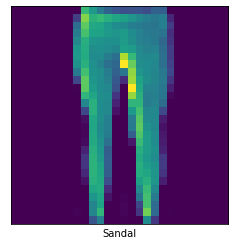

In [48]:
idx = np.random.randint(0, 10000)
plt.imshow(X_test[idx].reshape([28, 28]), cmap='viridis')
plt.xlabel(id2label[y_pred[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

0.9952833333333333


In [30]:
y_pred = clf.predict(X_train)
rf_accuracy = accuracy_score(y_train, y_pred)
print(rf_accuracy)
print(classification_report(y_train, y_pred, target_names=list(id2label.values())))

0.9952833333333333
              precision    recall  f1-score   support

 T-shirt/top       0.99      1.00      0.99      6000
     Trouser       1.00      1.00      1.00      6000
    Pullover       0.99      1.00      0.99      6000
       Dress       1.00      1.00      1.00      6000
        Coat       0.99      0.99      0.99      6000
      Sandal       1.00      1.00      1.00      6000
       Shirt       1.00      0.98      0.99      6000
     Sneaker       1.00      1.00      1.00      6000
         Bag       1.00      1.00      1.00      6000
  Ankle boot       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [33]:
y_hat = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_hat)
print(test_accuracy)
print(classification_report(y_test, y_hat, target_names=list(id2label.values())))

0.8625
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.84      0.80      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.75      0.80      0.77      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.78      0.81      0.79      1000
      Sandal       0.94      0.94      0.94      1000
       Shirt       0.71      0.55      0.62      1000
     Sneaker       0.92      0.92      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



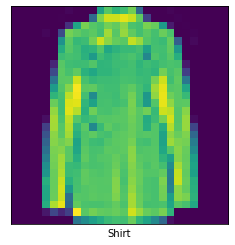

In [44]:
idx = np.random.randint(0, 10000)
plt.imshow(X_test[idx].reshape([28, 28]), cmap='viridis')
plt.xlabel(id2label[y_hat[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

## Regression

In [128]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
df_house = pd.read_csv("data/kc_house_data.csv")
display(df_house.head())
display(df_house.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


None

In [8]:
regressor = LinearRegression()
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
train_set = df_house.to_numpy()
X, y = train_set[:, 3:], train_set[:, 2]

In [12]:
# train regressor
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
len(X[0]), len(regressor.coef_)

(18, 18)

In [17]:
print("weights of linear regression:")
print(regressor.coef_)
print(regressor.intercept_)

weights of linear regression:
[-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]
6690324.603091352


In [35]:
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r_square = r2_score(y, y_pred)

print("mse:", mse)
print("rmse:", np.sqrt(mse))
print("mae:", mae)
print("r2:", r_square)

mse: 40466915557.49283
rmse: 201163.90222277163
mae: 125922.64612798461
r2: 0.6997471890109153


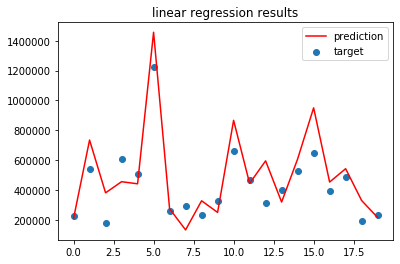

In [34]:
plt.scatter(range(len(X[:20])), y[:20], label="target")
plt.plot(range(len(X[:20])), y_pred[:20], label="prediction", color='r')
plt.title("linear regression results")
plt.legend()
plt.show()

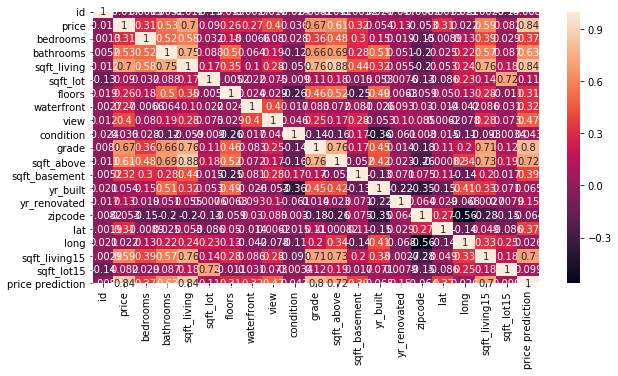

In [39]:
df_house["price prediction"] = y_pred
df_house[["price", "price prediction"]]

,price,price prediction
0,221900.0,208877.946258
1,538000.0,734051.824894
2,180000.0,380504.724865
3,604000.0,455050.866211
4,510000.0,440955.628485
...,...,...
21608,360000.0,483093.925405
21609,400000.0,438536.835277
21610,402101.0,143431.946476
21611,400000.0,385287.123172


In [52]:
regressor.__class__.__name__

'LinearRegression'

In [67]:
ridge = Ridge(alpha=1000)
lasso = Lasso(alpha=1000)
preds = []

for model in [ridge, lasso]:
    print("training", model.__class__.__name__)
    model.fit(X, y)
    y_pred = model.predict(X)
    preds.append(y_pred)
    
    # calculate error
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(
        "mse:", np.round(mse, 3), "rmse:", np.round(np.sqrt(mse), 3),
        "mae:", np.round(mae, 3), "r2:", np.round(r2, 2))


training Ridge
mse: 45615097441.135 rmse: 213576.912 mae: 133951.649 r2: 0.66
training Lasso
mse: 40773738115.655 rmse: 201925.08 mae: 125426.167 r2: 0.7


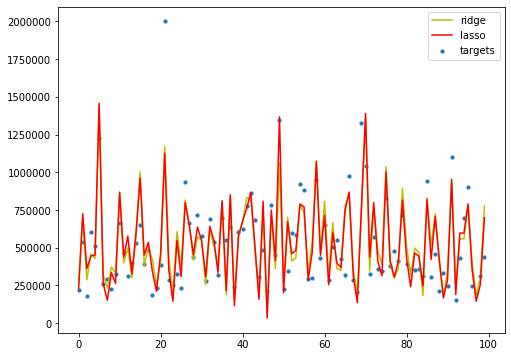

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X[:100])), y[:100], label="targets", s=10)
plt.plot(preds[0][:100], label="ridge", color="y")
plt.plot(preds[1][:100], label="lasso", color="r")
plt.legend()
plt.show()

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)
poly = PolynomialFeatures(degree=4)
X_poly = poly(X_train)

In [101]:
X_train.shape, X_test.shape

((17290, 18), (4323, 18))

In [108]:
ridge = Ridge(alpha=100)
lasso = Lasso(alpha=100)
linear = LinearRegression()
preds = []

for model in [linear, ridge, lasso]:
    print("-- training", model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds.append(y_pred)
    
    # calculate error
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(
        "mse:", np.round(mse, 3), "rmse:", np.round(np.sqrt(mse), 3),
        "mae:", np.round(mae, 3), "r2:", np.round(r2, 2))


-- training LinearRegression
mse: 50303785328.822 rmse: 224285.054 mae: 128260.971 r2: 0.69
-- training Ridge
mse: 51941190952.794 rmse: 227906.101 mae: 128938.808 r2: 0.68
-- training Lasso
mse: 50353995578.923 rmse: 224396.96 mae: 128181.443 r2: 0.69


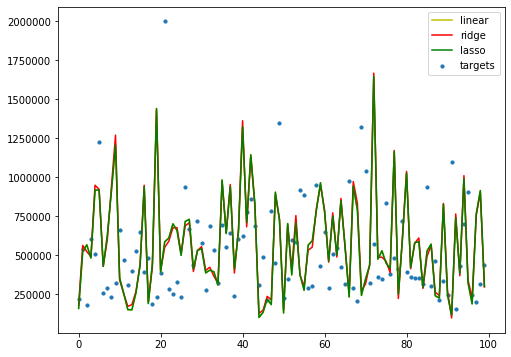

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X[:100])), y[:100], label="targets", s=10)
plt.plot(preds[0][:100], label="linear", color="y")
plt.plot(preds[1][:100], label="ridge", color="r")
plt.plot(preds[2][:100], label="lasso", color="g")
plt.legend()
plt.show()

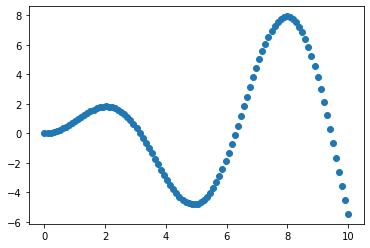

In [117]:
x = np.linspace(0, 10, 100)
np.random.shuffle(x)
y = x * np.sin(x)
plt.scatter(x, y)

In [130]:
x

array([0.2020202 , 0.70707071, 0.80808081, 1.31313131, 1.61616162,
       2.22222222, 2.42424242, 2.62626263, 3.03030303, 3.33333333,
       5.35353535, 5.45454545, 5.55555556, 7.37373737, 7.57575758,
       7.87878788, 8.68686869, 9.29292929, 9.39393939, 9.5959596 ])

In [135]:
for idx, val in enumerate([1, 2, 3]):
    print(idx, val)

0 1
1 2
2 3


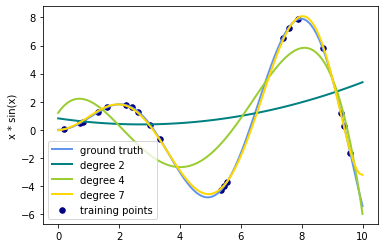

In [138]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.ylabel("x * sin(x)")

for count, degree in enumerate([2, 4, 7]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [133]:
X

array([[0.2020202 ],
       [0.70707071],
       [0.80808081],
       [1.31313131],
       [1.61616162],
       [2.22222222],
       [2.42424242],
       [2.62626263],
       [3.03030303],
       [3.33333333],
       [5.35353535],
       [5.45454545],
       [5.55555556],
       [7.37373737],
       [7.57575758],
       [7.87878788],
       [8.68686869],
       [9.29292929],
       [9.39393939],
       [9.5959596 ]])

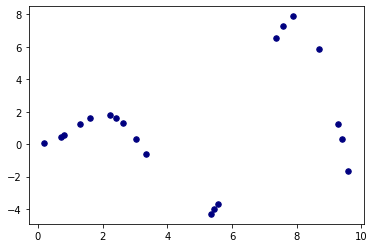

In [131]:
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")